### Иследование сервиса аренды самокатов GoFast

У нас в доступе данные о пользователях и их поездках на самокатах. Нам нужно проанализировать дынне о поездках пользователей с платной подпиской и без нее. Выяснить приблыны ли платные платные подписчики и стоит ли проводить акции для увелечения их количества.

У нас в распорижении 3 дата сета с онформацией: о пользоватиле, о поездках и датасет с типом подписки.

#### Цель иследования

Проанализировать данные и понять выгоднее ли сервису платные подписчики (приносят ли они больше прибыли), выяснить проезжают ли платные подписчики растояние менее 3130 метров что является оптимальным растоянием для износа самоката, сравнить помесячную выручку от платных и бесплатных плозователей

#### Ход иследования

Импортируем все необходимые библиотеки в pyhton

Данные получаем из датасетов '/datasets/users_go.csv', '/datasets/rides_go.csv', '/datasets/subscriptions_go.csv' сразу проверяем типы данных и если надо будет заменим их. Далее проверяем данные на явные и неявные дубликаты и избавляемся от них. После объеденяем все три датасета в один датасет для более удобной работы и анализа данных. Проверяем гипотезы и находим дополнительные нужные нам значения из датасетов

Загрузка данных

Предобработка дынных

Иследовательский анализ

Объединение данных

Подсчет выручки

Проверка гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

pd.set_option('display.max_columns', None)

Импортировали все необходимые библиотеки и так же сняли ограничение на вывод столбцов в таблице

#### Шаг 1. Загрузка данных

##### Таблица с пользователями

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')

In [3]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


##### Таблица с поездками

In [5]:
data_riders = pd.read_csv('/datasets/rides_go.csv')

In [6]:
data_riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Нужно будет приветсти столбец с датой к типу данных Datetime

##### Таблица с подписками

In [8]:
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')

In [9]:
data_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Все типы данных верны, кроме даты.

#### Шаг 2. Предобработка данных

##### Заемна типа данных в столбце date и добавление столбца month

In [11]:
data_riders['date'] = pd.to_datetime(data_riders['date'], format = '%Y-%m-%d')

In [12]:
data_riders['date'].head(5)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

In [13]:
data_riders['date'].dt.year.unique()

array([2021])

In [14]:
data_riders['month'] = data_riders['date'].dt.month

In [15]:
data_riders.head(5)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


##### Рассмотрим количество пропусков и дубликатов в таблицах

In [16]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
data_riders.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [18]:
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [19]:
data_users.duplicated().sum()

31

In [20]:
data_users.drop_duplicates(inplace=True)

In [21]:
data_users.duplicated().sum()

0

In [22]:
data_riders.duplicated().sum()

0

Пропущенных данных в таблицах нет.

Дубликаты имеются в таблице о пользователях, удалили дубликаты.

Добавили столбец month с номер месяца.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [23]:
count_users_by_city = data_users['city'].value_counts()
count_users_by_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [24]:
count_users_by_city['rate'] = round(data_users['city'].value_counts() / count_users_by_city.sum(), 2) * 100
count_users_by_city['rate']

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

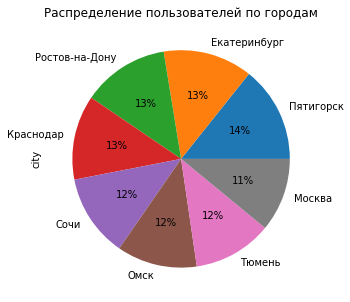

In [25]:
data_users['city'].value_counts().plot(
    kind = 'pie', 
    y = count_users_by_city,
    autopct = '%1.0f%%',
    figsize=(5,5), 
    title = 'Распределение пользователей по городам');

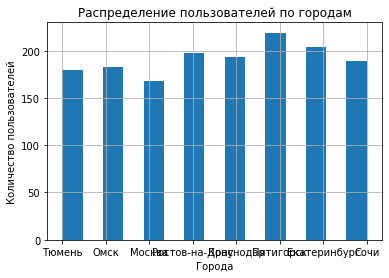

In [26]:
plt.hist(data_users['city'], bins =15)
plt.title('Распределение пользователей по городам')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Распледеление пользователей по городам практически равномерно между всеми городами. 

Самый популярный город Пятигорск, наименее популярный Москва

##### Соотношение пользователей с подпиской и без подписки

In [27]:
count_sub = data_users['subscription_type'].value_counts()
count_sub

free     835
ultra    699
Name: subscription_type, dtype: int64

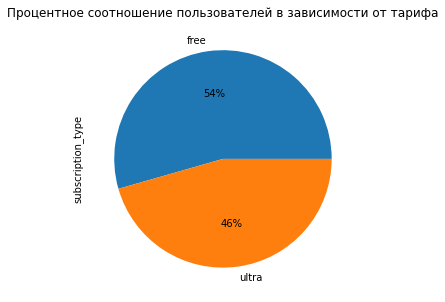

In [28]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_sub, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

Колиество пользователей без подписки больше на 10% от общего числа пользователей.

##### Возраст пользователей

In [29]:
data_users['age'].sort_values()

664     12
66      12
727     12
34      12
235     13
        ..
383     38
804     38
453     38
961     39
1201    43
Name: age, Length: 1534, dtype: int64

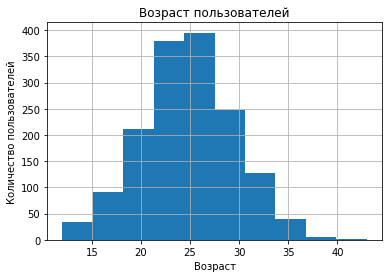

In [30]:
plt.hist(data_users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Самый молодой пользователь 12 лет, самый старший 43 года.

Средний возраст пользователя по гистограмме видно что от 20 до 30 лет.

##### Расстояние, которое пользователь преодолел за одну поездку

In [31]:
round(data_riders['distance'].sort_values(), 2)

11555       0.86
9541        2.57
13690       4.33
8658        6.78
7841        7.10
          ...   
17242    6724.93
17171    6760.94
15580    6908.49
16484    7066.00
16309    7211.01
Name: distance, Length: 18068, dtype: float64

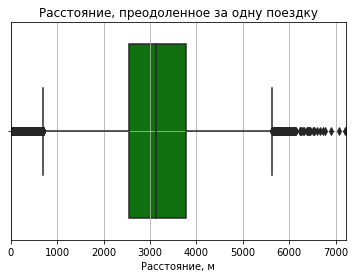

In [32]:
sns.boxplot(x=data_riders['distance'], color='green')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 7212)
plt.grid()

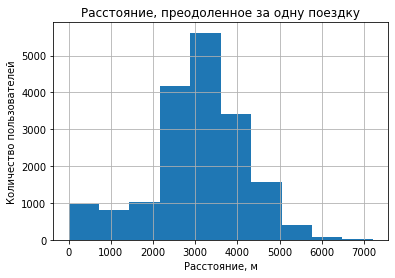

In [33]:
plt.hist(data_riders['distance'], bins = 10)
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Самая короткая поездка 0,86 метра, самая длинная 7211,01 метра.

Средняя длина поездки лежит в диапозоне от 2 км до 5 км.

##### Продолжительность поездок

In [34]:
data_riders['duration'].sort_values()

12013     0.500000
17314     0.500000
15029     0.500000
7437      0.500000
12967     0.500000
           ...    
6453     38.265229
1998     38.352763
2623     39.526602
4709     39.873856
4215     40.823963
Name: duration, Length: 18068, dtype: float64

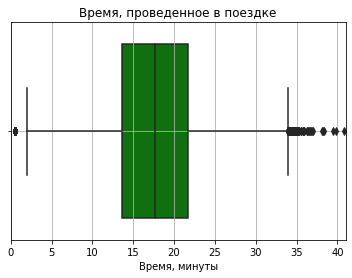

In [35]:
sns.boxplot(x = data_riders['duration'], color='green')
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
_ = plt.xlim(0, 41)
plt.grid()

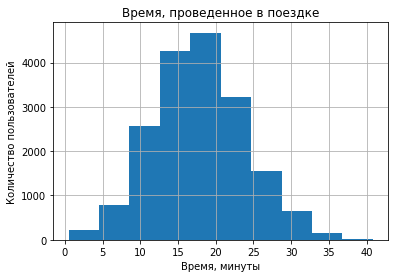

In [36]:
plt.hist(data_riders['duration'], bins = 10)
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Самая короткое время в поезде меньше 1 минуты, самая длинная почти 41 минута.

Среднее время поездки лежит в диапазоне от 10 до 25 минут.

##### Вывод

Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Самым популярным городом  по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168. Связано это скорее всего с тем, что в Пятигорске у данного приложения меньше конкурентов и более развитая инфраструктура чем в Москве, так же это может быть связано из-за того что Пятигорск меньше и в нем удобнее пользоваться самокатом.

Пользователей, использующих бесплатную подписку 835 человек, что является 54% от общего числа пользователей. Платной же подпиской пользуется 699 человек, что соответственно является 46%.

Самыми младшими являются пользователи 12 лет.
Самыми старшими - 43.
В целом, пользователи приложения укладываются в промежуток от 20 до 30 лет.

Самая короткая дистанция  0.86 м
Самая длинная  7.2 км
В основном пользователи проезжают от 2.5 км до 3.7 км.

Самые короткие поездки - 30 секунд. Возможно пользователи просто передумали пользоваться самокатом либо же техническая неинсправность самого самоката.
Самая длинная поездка заняла 40 минут.
В основном же длительность поездки состовляет 14 - 22 минут.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [37]:
data_users.shape

(1534, 5)

In [38]:
data_riders.shape

(18068, 5)

In [39]:
data_sub.shape

(2, 4)

In [40]:
all_data = data_users.merge(data_riders)
all_data = all_data.merge(data_sub)
all_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [41]:
all_data.shape

(18068, 12)

##### Создадим датафрейм с данными о пользователях без подписки

In [42]:
free_sub = all_data.query("`subscription_type` == 'free'")
free_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


##### Визуализируем информацию о расстоянии и времени на бесплатном тарифе

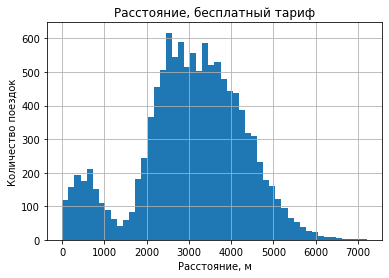

<Figure size 1440x1440 with 0 Axes>

In [43]:
plt.hist(free_sub['distance'], bins=50, range = (0, 7212))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.grid()
plt.figure(figsize=(20,20))
plt.show()

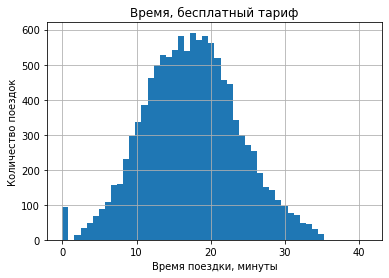

<Figure size 1440x1440 with 0 Axes>

In [44]:
plt.hist(free_sub['duration'], bins=50, range = (0, 41))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.grid()
plt.figure(figsize=(20,20))
plt.show()

##### Создадим датафрейм с данными о пользователях с подпиской

In [45]:
ultra_sub = all_data.query("`subscription_type` == 'ultra'")
ultra_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


##### Визуализируем информацию о расстоянии и времени на платном тарифе

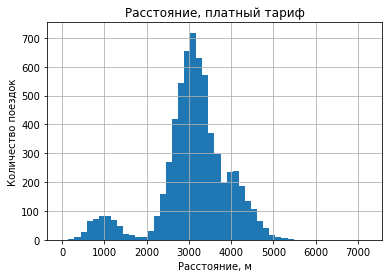

<Figure size 1440x1440 with 0 Axes>

In [46]:
plt.hist(ultra_sub['distance'], bins=50, range = (0, 7212))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.grid()
plt.figure(figsize=(20,20))
plt.show()

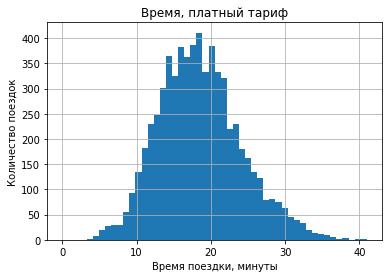

<Figure size 1440x1440 with 0 Axes>

In [47]:
plt.hist(ultra_sub['duration'], bins=50, range = (0, 41))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.grid()
plt.figure(figsize=(20,20))
plt.show()

##### Вывод

Обьединили все данные в один датафрейм all_data

На основе нового датафрейма выделили два фрейма с платной и бесплатной подпиской.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.

Платный тариф. В основном время укладывается в промежуток от 10 до 25 минут. Пик расстояния приходится на 3км.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

#### Шаг 5. Подсчёт выручки

##### Найдем суммарное расстояние, количество поeздок и суммарное время для каждого пользователя за каждый месяц

In [48]:
all_data['duration'] = np.ceil(all_data['duration'])

In [49]:
sum_data = pd.pivot_table(all_data,index=['month', 'user_id'],
                                   values = ['distance', 'duration', 'name', 'subscription_type'],
                                   aggfunc = {'distance': sum, 
                                              'duration' : sum, 
                                              'name' : len, 
                                              'subscription_type' : min})

In [50]:
sum_data.rename(columns = {'name' : 'count_tips'}, inplace = True)

In [51]:
sum_data.sort_values(by='month').head(5)

distance  duration  count_tips subscription_type
month user_id                                                      
1     1         7027.511294      42.0           2             ultra
      1061     12637.249630      43.0           3              free
      1063      3276.362299      10.0           1              free
      1064      5297.324649      15.0           1              free
      1065     14547.099333      99.0           4              free

##### Добавим столбец с помесячной выручкой

In [52]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_tips']

In [53]:
sum_data['revenue_per_month'] = sum_data.apply(revenue, axis=1)

In [54]:
sum_data['revenue_per_month'].head(10)

month  user_id
1      1          451.0
       3          277.0
       5          277.0
       7          367.0
       12         397.0
       13         451.0
       14         409.0
       15         433.0
       20         373.0
       22         277.0
Name: revenue_per_month, dtype: float64

##### Вывод

Создали новый датафрейм с данными (sum_data) на основе датафрейма с объединенными данными (all_data).


Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки?

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

H0: Время пользователей на подписке ultra = врени пользователей на подписке free

H1: Время пользователей на подписке ultra > врени пользователей на подписке free

In [55]:
ultra = ultra_sub['duration'] 

free = free_sub['duration']

results = st.ttest_ind(ultra, free, alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Проверили гипотезу, отвергли нулевую гипотезу о том, что время поездки пользователя на тарифе ultra равно времени поездки пользователя на тарифе free.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.

Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

H0: Расстояние пользователей на подписке ultra = 3130 метров

H1: Расстояние пользователей на подписке ultra < 3130 метров

In [56]:
ultra_dist = ultra_sub['distance']

interested_value = 3130.0

alpha = .05

results = st.ttest_1samp(ultra_dist, interested_value, alternative='less')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.08046311521502146
Не удалось отвергнуть нулевую гипотезу


Проверили гипотезу, мы не можем утверждать, что расстояние, проехавшие пользователи на тарифе ultra не превышает 3130 метров.

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

H0: Выручка пользователей на подписке ultra = выручки пользователей на подписке free

H1: Выручка пользователей на подписке ultra > выручки пользователей на подписке free

In [57]:
ultra_per_month = sum_data.loc[sum_data.subscription_type == 'ultra', 'revenue_per_month'] 

free_per_month = sum_data.loc[sum_data.subscription_type == 'free', 'revenue_per_month'] 


results = st.ttest_ind(ultra_per_month, free_per_month, alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Проверили гипотезу, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

H0 : μ1 = μ2

H1 : μ1 ≠ μ2

где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

#### Шаг 7. Распределения

#### Вывод

Мы начали с загрузки трех датафреймов: информации о пользователях, данных о поездках и информации о подписках. После тщательной проверки данных, мы изменили тип данных столбца "date" в датафрейме с информацией о поездках на формат даты. Затем добавили столбец "month" для указания месяца. Произведенная очистка данных включала удаление дубликатов в информации о пользователях.

Проанализировав данные, мы выяснили, что количество пользователей в разных городах распределено относительно равномерно, без значительных отклонений. Наибольшее количество пользователей обнаружено в Пятигорске (219 пользователей), наименьшее — в Москве (168 пользователей). По отношению к типам подписок, обнаружено, что 835 пользователей (54%) используют бесплатную подписку, в то время как 699 пользователей (46%) выбирают платную подписку. Возраст пользователей сконцентрирован в диапазоне от 20 до 30 лет.

Средние расстояния поездок составляют от 2 км до 5 км, а продолжительность поездок в основном колеблется в диапазоне от 10 до 25 минут.

Путем объединения данных о пользователях, поездках и подписках мы создали три дополнительных датафрейма: полный, подписка "ultra" и подписка "free". Проведенная визуализация показала, что для пользователей бесплатной подписки характерны поездки продолжительностью от 10 до 30 минут и длиной от 2 до 5 км, при этом есть случаи преодоления дистанции 6-6.5 км. В случае платной подписки, пик времени поездок приходится на 15-25 минут, а основное расстояние составляет 3 км.

После создания сводных данных для каждого пользователя по месяцам мы рассчитали суммарное расстояние, количество поездок и общее время. Эта информация была дополнена столбцом "revenue_per_month" с месячной выручкой. Проанализировав гипотезы, мы пришли к выводу, что пользователи с подпиской проводят больше времени в поездках, чем пользователи с бесплатной подпиской. Но мы не смогли отвергнуть гипотезу, что пользователи с подпиской ездят на расстояниях, не превышающих 3130 метров. Кроме того, обнаружено, что помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки.